# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [4]:
html=browser.html

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup=BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
df=pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")

In [8]:
df


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
list=[]

# Loop through the scraped data to create a list of rows


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [10]:
# Confirm DataFrame was created successfully
mars_df=df[0]

In [11]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [13]:
# Change data types for data analysis
mars_df=mars_df.astype({
    "id": "int",
    "sol": "float",
    "ls": "float",
    "min_temp" : "float",
    "pressure": "float"
})

In [14]:
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])

In [15]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?



12

In [16]:
mars_df['month'].nunique()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?


1867

In [17]:
mars_df['sol'].count()

1867

In [14]:
# 3. What is the average minimum temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [18]:
mars_avg=mars_df.groupby("month")["min_temp"].mean()
mars_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

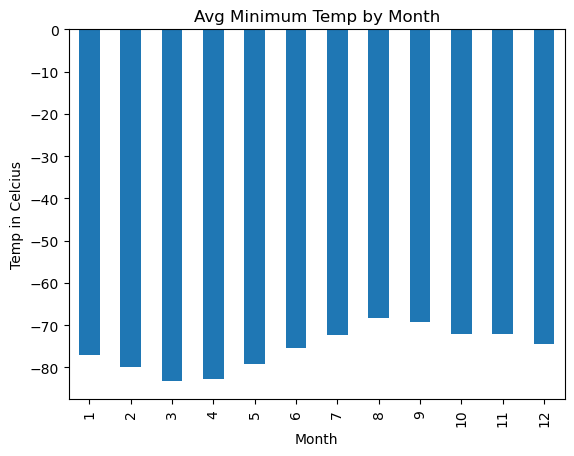

In [19]:
mars_avg.plot.bar()
plt.xlabel("Month")
plt.ylabel("Temp in Celcius")
plt.title("Avg Minimum Temp by Month")
plt.show()

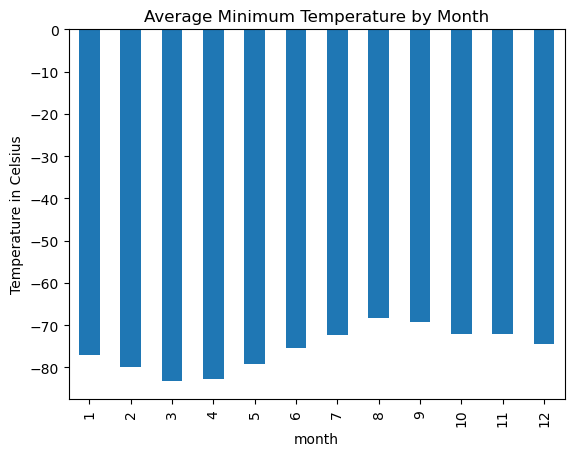

In [15]:
# Plot the average minimum temperature by month


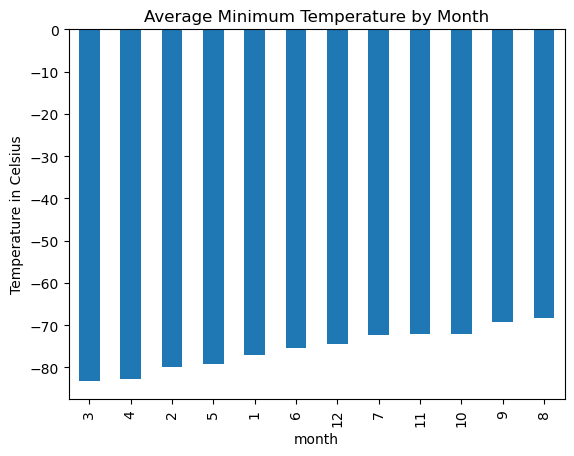

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


In [20]:
hottest_month=mars_df.groupby('month')['min_temp'].mean().sort_values(ascending=True)

In [21]:
hottest_month

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

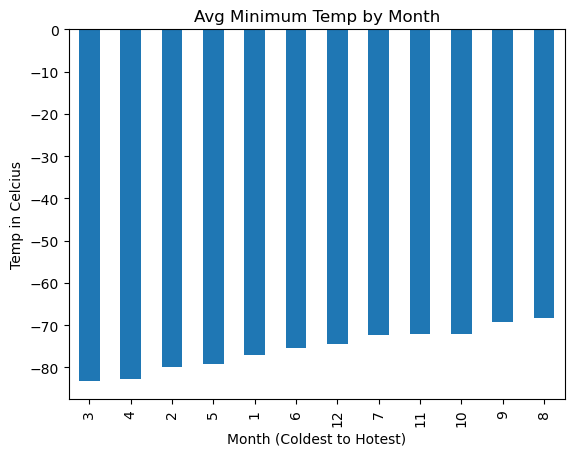

In [22]:
hottest_month.plot.bar()
plt.xlabel("Month (Coldest to Hotest)")
plt.ylabel("Temp in Celcius")
plt.title("Avg Minimum Temp by Month")
plt.show()

In [17]:
# 4. What is the average pressure by month?


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [23]:
avg_pressure=mars_df.groupby('month')['pressure'].mean()

In [24]:
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

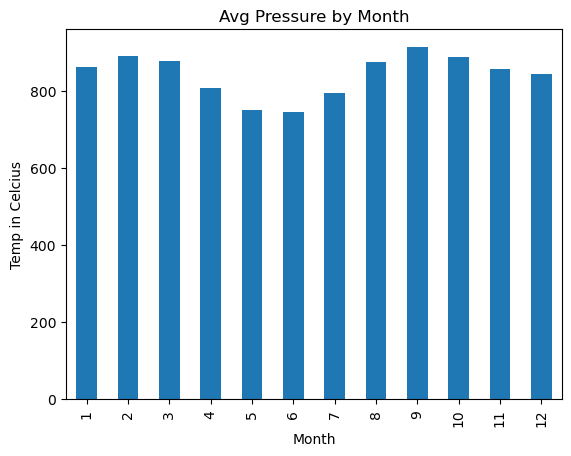

In [25]:
avg_pressure.plot.bar()
plt.xlabel("Month")
plt.ylabel("Temp in Celcius")
plt.title("Avg Pressure by Month")
plt.show()

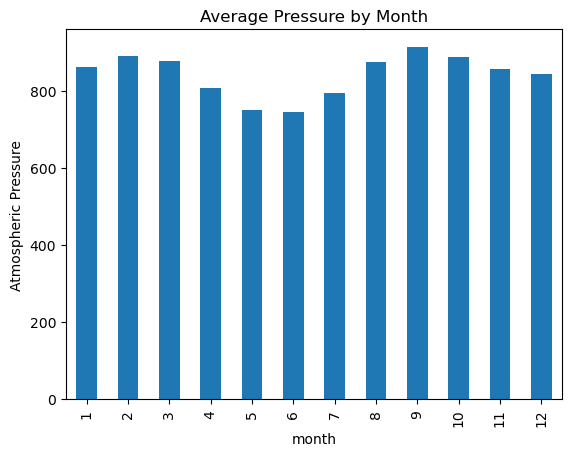

In [18]:
# Plot the average pressure by month


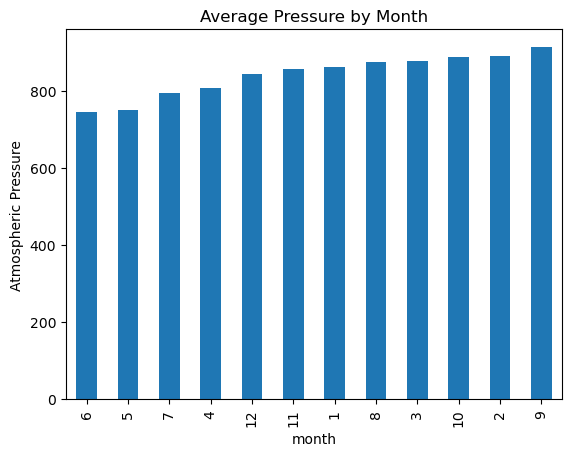

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


In [26]:
sorted_pressure=mars_df.groupby('month')['pressure'].mean().sort_values(ascending=True)

In [27]:
sorted_pressure

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

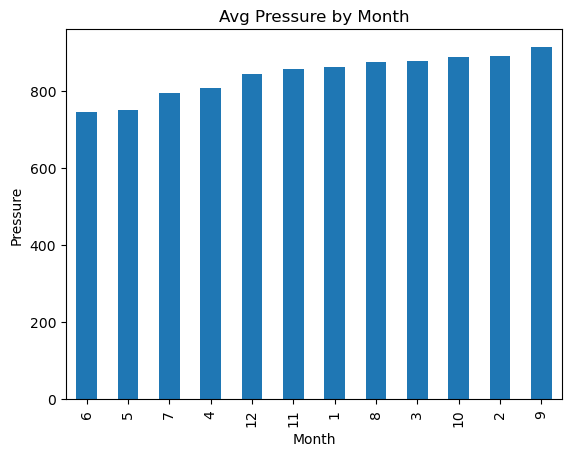

In [28]:
sorted_pressure.plot.bar()
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title("Avg Pressure by Month")
plt.show()

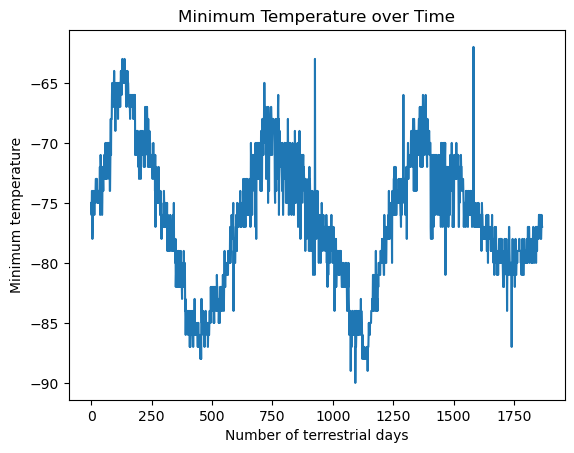

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


Text(0.5, 1.0, 'Min Temp over Time')

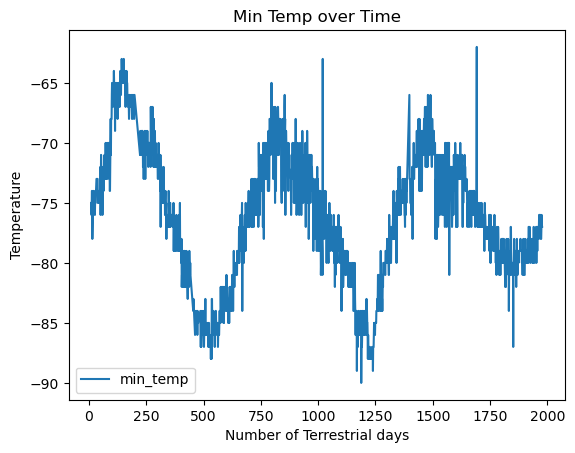

In [29]:
mars_df.plot(x='sol', y='min_temp')
plt.xlabel("Number of Terrestrial days")
plt.ylabel("Temperature")
plt.title("Min Temp over Time")

#### Minimum Temperature

YOUR ANALYSIS HERE

Overall the min Temp in Mars can get very cold with all 12 months averaging temps well below 0 degrees Celsius. With month 3 being the coldest and according to the data set the coldest recorded temp reached a-90 degrees Celsius. 

#### Atmospheric Pressure

YOUR ANALYSIS HERE

The pressure around Mars seems to be high across all 12 months. Even its lowest ever recorded equals to 727.0Kpa. According to outside sources the highest levels of pressure a human can withstand is between (400-500Kpa).

#### Year Length

YOUR ANALYSIS HERE

By observing the lowest Temp plotted against the terrestrial days we can estimate that there are about (500-600) earth days in a Martian year. We can closely examine the lowest point of the graph by observing the pivot points.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV
mars_df.to_csv('Mars_data.csv', index=False)

In [31]:
browser.quit()